<a href="https://colab.research.google.com/github/RishavRajSharma/NNDL-Lab/blob/main/NNDL_Exp_1_(Single_digit).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist


In [2]:
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Expand dimensions (28,28,1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Create segmentation masks (binary)
# Digit = 1, Background = 0
y_train_mask = (x_train > 0.1).astype(np.float32)
y_test_mask = (x_test > 0.1).astype(np.float32)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
def segmentation_model():
    model = models.Sequential([
        layers.Conv2D(32, 3, activation='relu', padding='same', input_shape=(28,28,1)),
        layers.MaxPooling2D(),

        layers.Conv2D(64, 3, activation='relu', padding='same'),
        layers.UpSampling2D(),

        layers.Conv2D(1, 3, activation='sigmoid', padding='same')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

seg_model = segmentation_model()
seg_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 1)      │           577 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,393 (75.75 KB)

 Trainable params: 19,393 (75.75 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
seg_model.fit(
    x_train, y_train_mask,
    epochs=5,
    batch_size=128,
    validation_split=0.1
)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 143s 333ms/step - accuracy: 0.9738 - loss: 0.1638 - val_accuracy: 0.9905 - val_loss: 0.0244
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 138s 324ms/step - accuracy: 0.9916 - loss: 0.0215 - val_accuracy: 0.9937 - val_loss: 0.0162
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 135s 321ms/step - accuracy: 0.9944 - loss: 0.0146 - val_accuracy: 0.9954 - val_loss: 0.0121
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 146s 331ms/step - accuracy: 0.9956 - loss: 0.0114 - val_accuracy: 0.9960 - val_loss: 0.0103
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 146s 345ms/step - accuracy: 0.9962 - loss: 0.0099 - val_accuracy: 0.9965 - val_loss: 0.0092


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


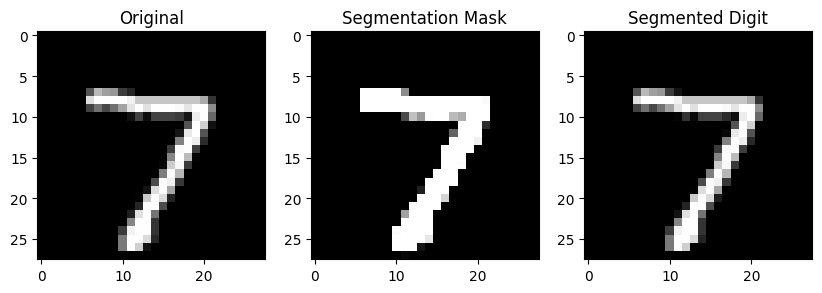

In [5]:
sample = x_test[:1]
pred_mask = seg_model.predict(sample)

plt.figure(figsize=(10,3))

plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(sample[0].squeeze(), cmap="gray")

plt.subplot(1,3,2)
plt.title("Segmentation Mask")
plt.imshow(pred_mask[0].squeeze(), cmap="gray")

plt.subplot(1,3,3)
plt.title("Segmented Digit")
plt.imshow(sample[0].squeeze() * pred_mask[0].squeeze(), cmap="gray")

plt.show()


In [6]:
def classifier_model():
    model = models.Sequential([
        layers.Conv2D(32, 3, activation='relu', input_shape=(28,28,1)),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

clf_model = classifier_model()
clf_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Apply segmentation to training images
x_train_segmented = x_train * y_train_mask
x_test_segmented = x_test * y_test_mask

clf_model.fit(
    x_train_segmented, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1
)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 46s 105ms/step - accuracy: 0.8533 - loss: 0.5107 - val_accuracy: 0.9843 - val_loss: 0.0595
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 80s 100ms/step - accuracy: 0.9792 - loss: 0.0682 - val_accuracy: 0.9892 - val_loss: 0.0413
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 100ms/step - accuracy: 0.9875 - loss: 0.0405 - val_accuracy: 0.9893 - val_loss: 0.0366
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 105ms/step - accuracy: 0.9897 - loss: 0.0323 - val_accuracy: 0.9905 - val_loss: 0.0372
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 102ms/step - accuracy: 0.9922 - loss: 0.0235 - val_accuracy: 0.9907 - val_loss: 0.0305


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


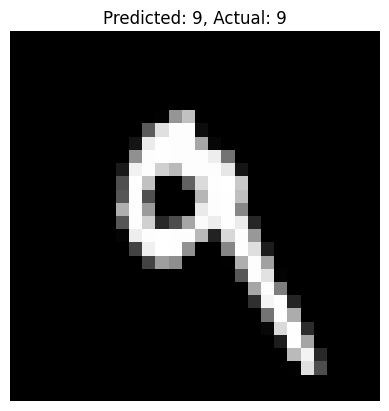

In [8]:
index = 7  # change index to test different images

img = x_test[index:index+1]
true_label = y_test[index]

mask = seg_model.predict(img)
segmented_img = img * mask

prediction = clf_model.predict(segmented_img)
predicted_label = np.argmax(prediction)

plt.imshow(segmented_img[0].squeeze(), cmap="gray")
plt.title(f"Predicted: {predicted_label}, Actual: {true_label}")
plt.axis("off")
plt.show()
